In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data = pd.read_csv('Mall_Customers.csv')
data = pd.DataFrame(data)
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [85]:
data.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [87]:
data.drop("CustomerID",axis=1,inplace=True)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.5+ KB


In [89]:
no_of_male=data['Gender'].value_counts().Male
no_of_female=data['Gender'].value_counts().Female
print(no_of_male,no_of_female)

88 112


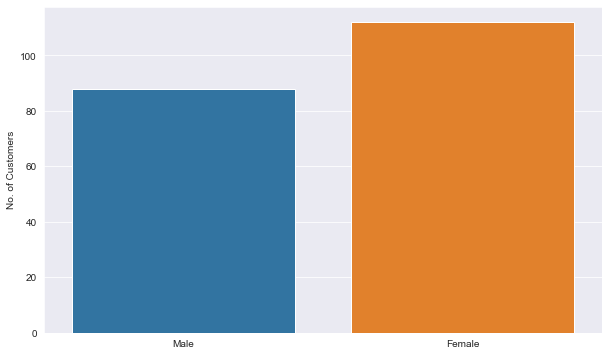

In [90]:
x=['Male','Female']
y=[no_of_male,no_of_female]
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.ylabel('No. of Customers')
sns.barplot(x=x,y=y)
plt.show()

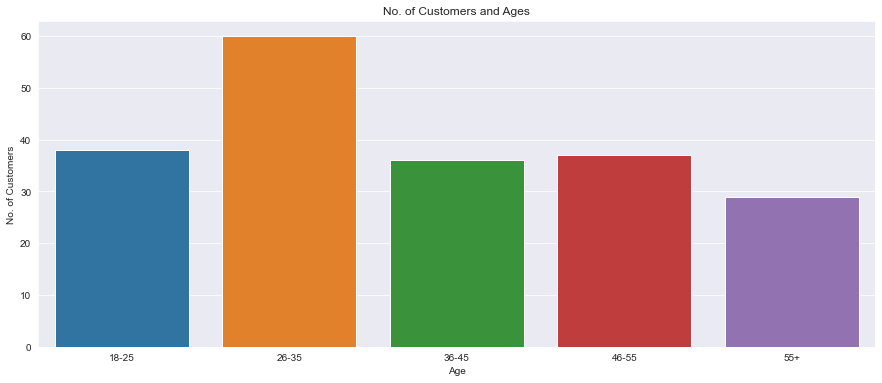

In [91]:
age18_25 = data[(data['Age'] <= 25) & (data['Age'] >= 18)]
age26_35 = data[(data['Age'] <= 35) & (data['Age'] >= 26)]
age36_45 = data[(data['Age'] <= 45) & (data['Age'] >= 36)]
age46_55 = data[(data['Age'] <= 55) & (data['Age'] >= 46)]
age56__  = data[data['Age'] >= 56]
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25),len(age26_35),len(age36_45),len(age46_55),len(age56__)]
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y)
plt.title("No. of Customers and Ages")
plt.xlabel("Age")
plt.ylabel("No. of Customers")
plt.show()



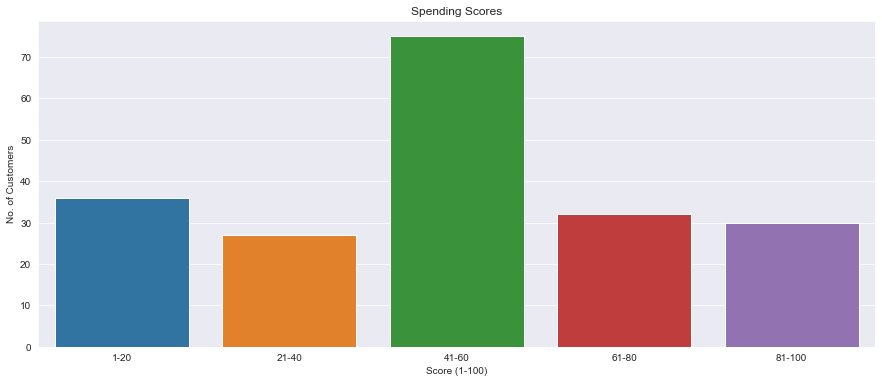

In [92]:
ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]
x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
y = [len(ss1_20), len(ss21_40), len(ss41_60), len(ss61_80), len(ss81_100)]
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y)
plt.title("Spending Scores")
plt.xlabel("Score (1-100)")
plt.ylabel("No. of Customers")
plt.show()

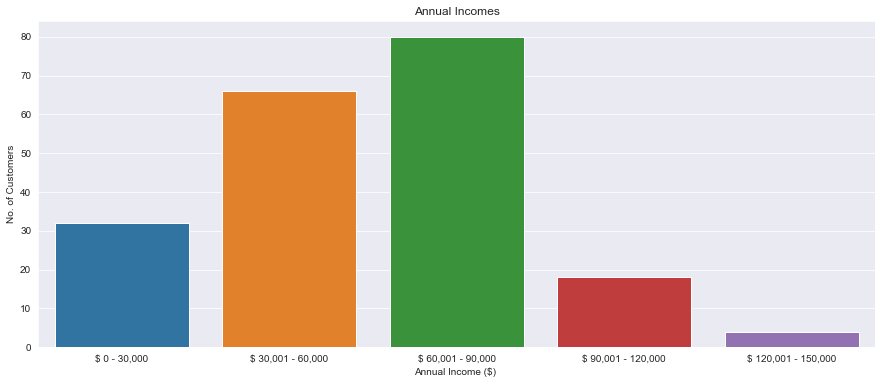

In [93]:
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]
x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
y = [len(ai0_30), len(ai31_60), len(ai61_90), len(ai91_120), len(ai121_150)]
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y)
plt.title("Annual Incomes")
plt.xlabel("Annual Income ($) ")
plt.ylabel("No. of Customers")
plt.show()

In [94]:
import numpy as np
from sklearn.cluster import KMeans

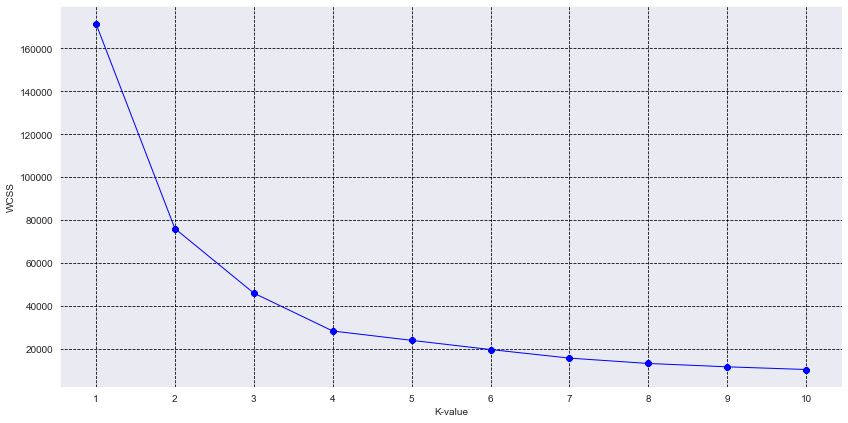

In [95]:
arr=data.loc[:,["Age" ,"Spending Score (1-100)"]].values
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(arr)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,7))    
plt.grid(b=True,linestyle="--",color="black")
plt.plot(range(1,11),wcss,linewidth=1, color="blue", marker ="8")
plt.xlabel("K-value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [96]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(arr)
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


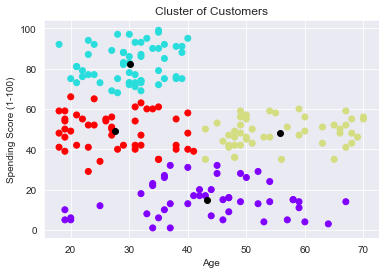

In [97]:
plt.scatter(arr[:,0],arr[:,1], c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

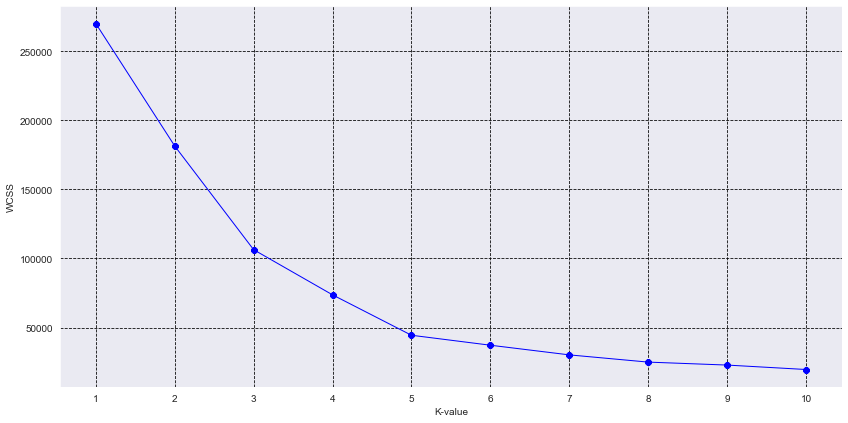

In [98]:
arr=data.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(arr)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,7))    
plt.grid(b=True,linestyle="--",color="black")
plt.plot(range(1,11),wcss,linewidth=1, color="blue", marker ="8")
plt.xlabel("K-value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [99]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(arr)
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


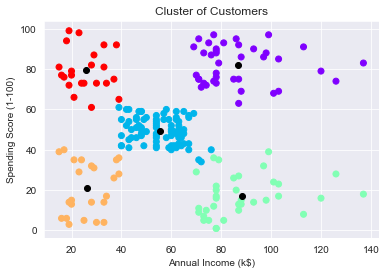

In [100]:
plt.scatter(arr[:,0],arr[:,1], c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()